In [422]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pl
# from scipy.constants import epsilon_0
epsilon_0 = 8.85e-12

In [423]:
from sys import stdout
def exportTypstTable(header, rows, format='[{:.3f}]', file=stdout):
    assert len(header) == len(rows[0])

    print(f'#table(columns: {len(header):d},')

    for cell in header:
        print(f'[{cell}],', end='')
    print()

    for row in rows:
        print(','.join(format.format(cell) for cell in row) + ',')
    print(')')


In [424]:
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif']  = 'Times New Roman'

defaultPlotOptions = {
    "linewidth": 1.5,
    "color": "black",
}
defaultXLabelOptions = {
    "loc": "right"
}
defaultYLabelOptions = {
    "loc": "top",
    "rotation": 0,
    "labelpad": -10
}

%matplotlib inline

In [425]:
%mkdir img

A subdirectory or file img already exists.


# Измерения

In [426]:
# --- CHANGE THIS --- 
table1 = np.array([
    [1  , .351, 1  , .261, 1  , .218],
    [30 , .351, 30 , .261, 30 , .218],
    [60 , .351, 60 , .261, 60 , .218],
    [90 , .351, 90 , .261, 90 , .218],
    [120, .351, 120, .261, 120, .217],
    [150, .351, 150, .261, 150, .217],
    [180, .351, 180, .252, 180, .214],
    [210, .349, 210, .252, 210, .206],
    [240, .316, 240, .198, 240, .155],
    [270, .221, 270, .146, 270, .112],
    [300, .170, 300, .115, 300, .090],
    [330, .151, 330, .101, 330, .074],
    [360, .130, 360, .082, 360, .060],
    [390, .112, 390, .070, 390, .057],
    [420, .098, 420, .060, 420, .044],
    [450, .085, 450, .052, 450, .038],
    [480, .075, 480, .046, 480, .034],
    [510, .067, 510, .041, 510, .031],
])*1e-3

IL13 = table1[:, 0]
IA13 = table1[:, 1]
IL10 = table1[:, 2]
IA10 = table1[:, 3]
IL9  = table1[:, 4]
IA9  = table1[:, 5]


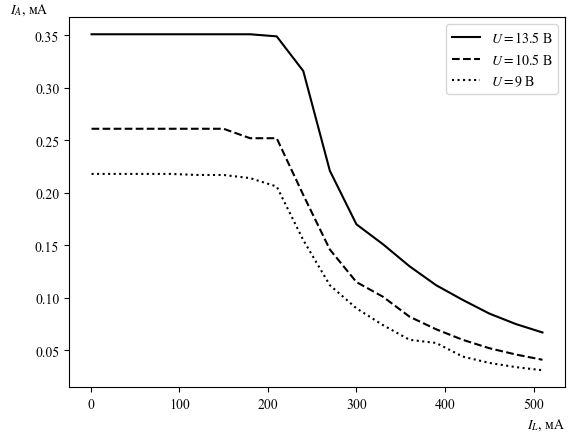

In [427]:
fig, ax = plt.subplots()

ax.set_xlabel('$I_L$, мА', **defaultXLabelOptions)
ax.set_ylabel('$I_A$, мА', **defaultYLabelOptions)


ax.plot(IL13 * 1e3, IA13 * 1e3,
        **defaultPlotOptions, linestyle="-", label="$U=13.5$ В"
        )
ax.plot(IL10 * 1e3, IA10 * 1e3,
        **defaultPlotOptions, linestyle="--", label="$U=10.5$ В"
        )
ax.plot(IL9  * 1e3, IA9 * 1e3,
        **defaultPlotOptions, linestyle=":", label="$U=9$ В"
        )

fig.legend(bbox_to_anchor=(.90,0.88))


fig.savefig("img/fig2.svg", format="svg", bbox_inches='tight')
plt.show(fig)

_fig, _ax = fig, ax

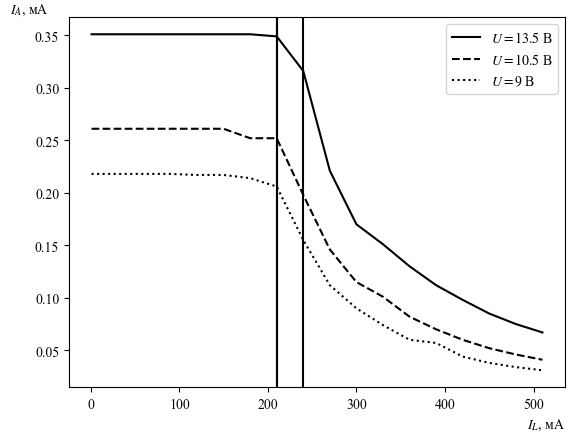

In [428]:
fig, ax = _fig, _ax

dy13 = IA13[1:] - IA13[:-1]
# vertLine13Idx = np.where(np.abs(dy13) > 1e-5)[0][0]
vertLine13Idx = 8
ax.axvline(IL13[vertLine13Idx]*1e3, **defaultPlotOptions)

dy10 = IA10[1:] - IA10[:-1]
# vertLine10Idx = np.where(np.abs(dy10) > 1e-5)[0][0]
vertLine10Idx = 7
ax.axvline(IL10[vertLine10Idx]*1e3, **defaultPlotOptions)

dy9 = IA9[1:] - IA9[:-1]
vertLine10Idx = 7
ax.axvline(IL9[vertLine9Idx]*1e3, **defaultPlotOptions)


fig.savefig("img/fig2.svg", format="svg", bbox_inches='tight')
fig

In [429]:
# See tab/table1.typ
exportTypstTable( [
        '$I_L = $ ... мА',
        '$I_A = $ ... мА',
        '$I_L = $ ... мА',
        '$I_A = $ ... мА',
        '$I_L = $ ... мА',
        '$I_A = $ ... мА',
    ], 
    table1)


#table(columns: 6,
[$I_L = $ ... мА],[$I_A = $ ... мА],[$I_L = $ ... мА],[$I_A = $ ... мА],[$I_L = $ ... мА],[$I_A = $ ... мА],
[0.001],[0.000],[0.001],[0.000],[0.001],[0.000],
[0.030],[0.000],[0.030],[0.000],[0.030],[0.000],
[0.060],[0.000],[0.060],[0.000],[0.060],[0.000],
[0.090],[0.000],[0.090],[0.000],[0.090],[0.000],
[0.120],[0.000],[0.120],[0.000],[0.120],[0.000],
[0.150],[0.000],[0.150],[0.000],[0.150],[0.000],
[0.180],[0.000],[0.180],[0.000],[0.180],[0.000],
[0.210],[0.000],[0.210],[0.000],[0.210],[0.000],
[0.240],[0.000],[0.240],[0.000],[0.240],[0.000],
[0.270],[0.000],[0.270],[0.000],[0.270],[0.000],
[0.300],[0.000],[0.300],[0.000],[0.300],[0.000],
[0.330],[0.000],[0.330],[0.000],[0.330],[0.000],
[0.360],[0.000],[0.360],[0.000],[0.360],[0.000],
[0.390],[0.000],[0.390],[0.000],[0.390],[0.000],
[0.420],[0.000],[0.420],[0.000],[0.420],[0.000],
[0.450],[0.000],[0.450],[0.000],[0.450],[0.000],
[0.480],[0.000],[0.480],[0.000],[0.480],[0.000],
[0.510],[0.000],[0.510],[0.000],[0.510]

In [430]:
IL13_c = IL13[vertLine13Idx] * 1e6
IL10_c = IL10[vertLine13Idx] * 1e6
IL9_c = IL9[vertLine13Idx] * 1e6

table2 = np.array([
    [9   , IL9_c , 0, 0],
    [10.5, IL10_c, 0, 0],
    [13.5, IL13_c, 0, 0],
])                 

In [431]:
stand_l  = .036
stand_ra = .003
stand_N  = 1500
stand_d  = .037
const_mu0 = 4*np.pi*1e-7

B_c = const_mu0*table2[:, 1]*stand_N * 1 / np.sqrt(stand_l**2 + stand_d**2)

In [432]:
table2[:, 2] = B_c
table2

array([[9.00000000e+00, 2.40000000e+05, 8.76322087e+03, 0.00000000e+00],
       [1.05000000e+01, 2.40000000e+05, 8.76322087e+03, 0.00000000e+00],
       [1.35000000e+01, 2.40000000e+05, 8.76322087e+03, 0.00000000e+00]])

# 3

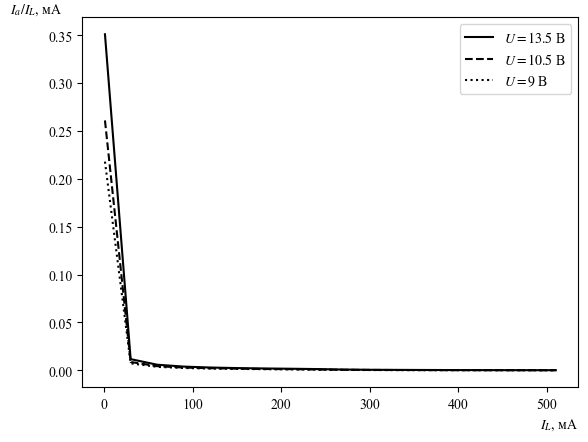

In [433]:
fig, ax = plt.subplots()

ax.plot(IL13 * 1e3, IA13 / IL13 ,
        **defaultPlotOptions, linestyle="-", label="$U=13.5$ В"
        )
ax.plot(IL10 * 1e3, IA10 / IL10 ,
        **defaultPlotOptions, linestyle="--", label="$U=10.5$ В"
        )
ax.plot(IL9  * 1e3, IA9/IL9 ,
        **defaultPlotOptions, linestyle=":", label="$U=9$ В"
        )

fig.legend(bbox_to_anchor=(.90,0.88))


ax.set_xlabel('$I_L$, мА', **defaultXLabelOptions)
ax.set_ylabel('$I_a / I_L$, мА', **defaultYLabelOptions)

fig.savefig('img/fig3.svg', format='svg', bbox_inches='tight')
plt.show(fig)

In [436]:
U = table2[:, 0]
B_c = table2[:, 1]

e_m_average = np.mean(8*U / B_c**2 / stand_ra**2)
e_m_average

0.00016975308641975308

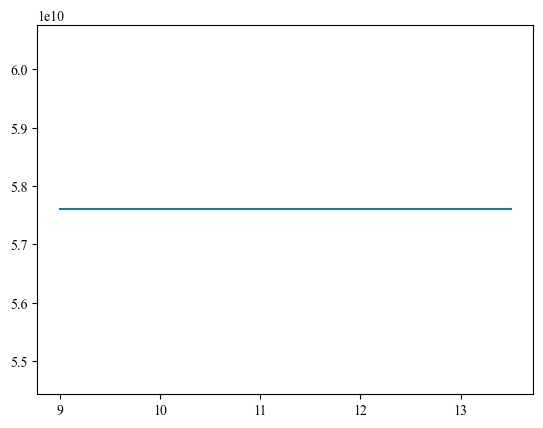

In [445]:
fig, ax = plt.subplots()


plt.plot(U, B_c**2)